In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Dropout
from tensorflow.keras.datasets import fashion_mnist

fashion_mnist = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
tf.random.set_seed(42)
model = Sequential([InputLayer(shape=[28,28]),
                    Flatten(),
                    Dropout(0.3),
                    Dense(300, activation='relu'),  #Dense parametrlari bar bolgan haqiyqiy layer
                    Dense(100, activation='relu'),
                    Dropout(0.3),
                    Dense(10, activation='softmax')
                    ]) 

In [24]:
optimizer = Adam(learning_rate = 0.0005)
model.compile(loss='sparse_categorical_crossentropy', optimizer  = optimizer, metrics=['accuracy'] )

In [29]:
history  = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8816 - loss: 0.3194 - val_accuracy: 0.8773 - val_loss: 0.3394
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8827 - loss: 0.3149 - val_accuracy: 0.8778 - val_loss: 0.3313
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8838 - loss: 0.3062 - val_accuracy: 0.8808 - val_loss: 0.3283
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8852 - loss: 0.3015 - val_accuracy: 0.8840 - val_loss: 0.3225
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8880 - loss: 0.2986 - val_accuracy: 0.8836 - val_loss: 0.3322
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8895 - loss: 0.2943 - val_accuracy: 0.8828 - val_loss: 0.3314
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8891 - loss: 0.2912 - val_accuracy: 0.8862 - val_loss: 0.3187
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8902 - loss: 0

In [30]:
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


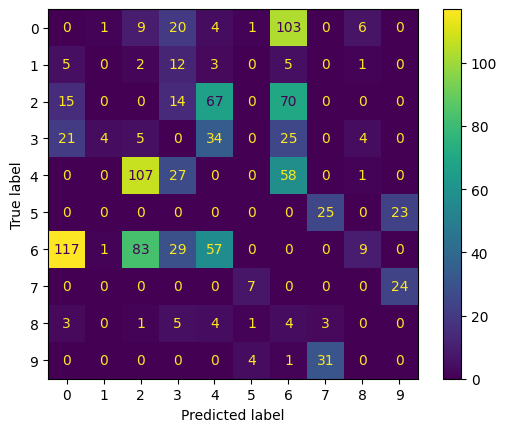

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, sample_weight=y_pred!=y_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()